Box Plot

In [18]:
# Q1,Q3,IQR = Q3-Q1,Min, lower_whisker = Q1 - 1.5 * IQR ,Max, higher_whisker = Q3 + 1.5 * IQR,Medium -> Box Plot

In [19]:
import numpy as np
datas = [1,23,43,2,1,34,53,54,5,3,54,3,5,34,34,65,3,154,11,36,3]
mini, q1, median, q3, maxi = np.quantile(datas,[0,0.25,0.5,0.75,1])
print([mini,q1,median,q3,maxi])

[1.0, 3.0, 23.0, 43.0, 154.0]


In [20]:
# IQR -> inter-quantile-range
IQR = q3 - q1
print(IQR)

40.0


In [21]:
# lower_whisker
lw = q1 - 1.5*IQR
print("lf ",lf )

# Higher_whisker
hw = q3 + 1.5*IQR
print("hf ",hf)

lf  -57.0
hf  103.0


<Axes: >

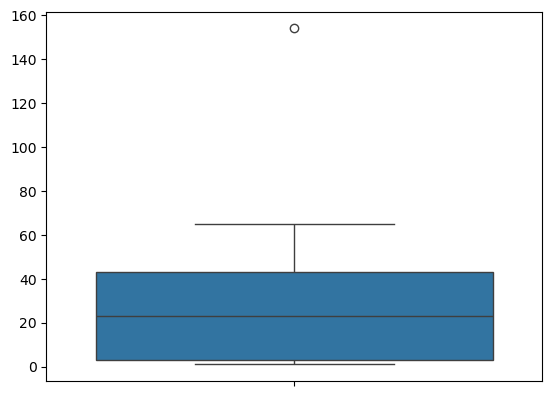

In [22]:
import seaborn as sns
sns.boxplot(datas)

Data Encoding

In [23]:
# converting the categorical -> numerical value is Data Encoding
"""
1. Nominal Encoding
2. Label and Ordinal Encoding 
3. Target Guided Ordinal Encoding  
"""

'\n1. Nominal Encoding\n2. Label and Ordinal Encoding \n3. Target Guided Ordinal Encoding  \n'

One Hot Encoding


In [ ]:
"""
disadvantage
create n number of features for n_categories
spare matrix -> overfitting
"""

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame({
    "color":["red","green","blue","green","blue","red"]
})
encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[["color"]]).toarray()
print(encoded)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [28]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0


In [30]:
encoder.transform([["blue"]]).toarray()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [31]:
pd.concat([data,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,blue,1.0,0.0,0.0
3,green,0.0,1.0,0.0
4,blue,1.0,0.0,0.0
5,red,0.0,0.0,1.0


Label Encoding

In [34]:
# assigning a unique numerical label to each category in the variable
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.DataFrame({
    "color" : ["red","blue","green","blue","red","green","red"]
})
Label_encoder = LabelEncoder()
label_encoded = Label_encoder.fit_transform(data[["color"]])
print(label_encoded)

[2 0 1 0 2 1 2]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ordinal Encoding

In [ ]:
# giving rank
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({
    "level" : ["primary","highschool","degree","puc","highschool"]
})
ordinal_encoder = OrdinalEncoder(categories=[["primary","highschool","puc","degree"]]) #ranking
ordinal_encoded = ordinal_encoder.fit_transform(data[["level"]])
print(ordinal_encoded)
print("")
print(ordinal_encoder.transform([["degree"]]))

[[0.]
 [1.]
 [3.]
 [2.]
 [1.]]

[[3.]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


Target Guided Ordinal Encoding

In [ ]:
# encoding target variable based on their realationship with target variable

"""
Target Guided Ordinal Encoding we replace each category in the category variable with
numerical value based on the mean and median of target variable for that category
"""

'\nTarget Guided Ordinal Encoding we replace each category in the category variable with\nnumerical value based on the mean and median of target variable for that category\n'

In [47]:
import pandas as pd

data = pd.DataFrame({
    "city" : ["new york","landon","paris","tokyo","new york","paris"],
    "price" : [200,150,300,250,180,320]
})
mean_val = data.groupby("city")["price"].mean().to_dict()
print(mean_val)

{'landon': 150.0, 'new york': 190.0, 'paris': 310.0, 'tokyo': 250.0}


In [49]:
data["city_encoded"] = data["city"].map(mean_val)
print(data["city_encoded"])

0    190.0
1    150.0
2    310.0
3    250.0
4    190.0
5    310.0
Name: city_encoded, dtype: float64


In [50]:
data[["price","city_encoded"]]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0
